<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 7

**Name:** Rishi Kaul

**UID:** 2018130019

**Objective:**
Separating Spam From Ham

In [60]:
!pip install scikit-plot

In [47]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Begin by loading the dataset emails.csv into a data frame called emails

In [21]:
path = '/gdrive/My Drive/Datasets/emails.csv'
data = pd.read_csv(path)

In [22]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Question: How many emails are there in this dataset

Ans. In this dataset, there are 5728 emails

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Question: How many spam emails are there in this dataset

Ans. In this dataset, there are 1368 spam emails and 4360 ham emails.


In [24]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

Which word appears at the beginning of every email in the dataset? Respond as a lower-case word with punctuation removed.

In [25]:
first_word = re.findall(r"[\w']+|[.,!?;]" ,data['text'][0])
first_word[0].lower()

'subject'

Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?

The word 'subject' appears in every email and cannot be used to classify whether the email is spam or ham

How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?

In [26]:
max_len = data.text.str.len().max()
max_len

43952

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

def preprocess(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # Removing stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    ##Applying stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    text = ' '.join(text)
    return text

In [29]:
corpus = data.apply(lambda x : preprocess(x['text']), axis = 1)

In [30]:
data['text'] = corpus

In [31]:
data.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [32]:
vec1 = TfidfVectorizer()
data1 = vec1.fit_transform(data['text'])

In [33]:
dtm = pd.DataFrame(data1.toarray(),columns=vec1.get_feature_names())
dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5724,0.033416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5725,0.121873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5726,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 29254 words in the dtm.

In [34]:
emailsSparse = pd.DataFrame(dtm)
emailsSparse.shape

(5728, 29254)

In [35]:
data['spam']

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

In [36]:
emailsSparse['spamOrNot'] = data['spam']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(emailsSparse.drop(['spamOrNot'], axis=1), emailsSparse['spamOrNot'], train_size=0.7)
print("Training set size: ", X_train.shape[0])
print("Testing set size: ", X_test.shape[0])

Training set size:  4009
Testing set size:  1719


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
spamCART = DecisionTreeClassifier()
cart = spamCART.fit(X_train, y_train)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, f1_score

In [45]:
training_acc = round(accuracy_score(y_train, spamCART.predict(X_train)),3)*100
print('Training Accuracy = {}%'.format(training_acc))
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_train, spamCART.predict(X_train)))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_train, spamCART.predict(X_train)))
print("AUC: ", roc_auc_score(y_train, spamCART.predict_proba(X_train)[:, 1]))

Training Accuracy = 100.0%

 Confusiton Matrix:
 [[3064    0]
 [   0  945]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3064
           1       1.00      1.00      1.00       945

    accuracy                           1.00      4009
   macro avg       1.00      1.00      1.00      4009
weighted avg       1.00      1.00      1.00      4009

AUC:  1.0


In [49]:
from sklearn.tree import plot_tree

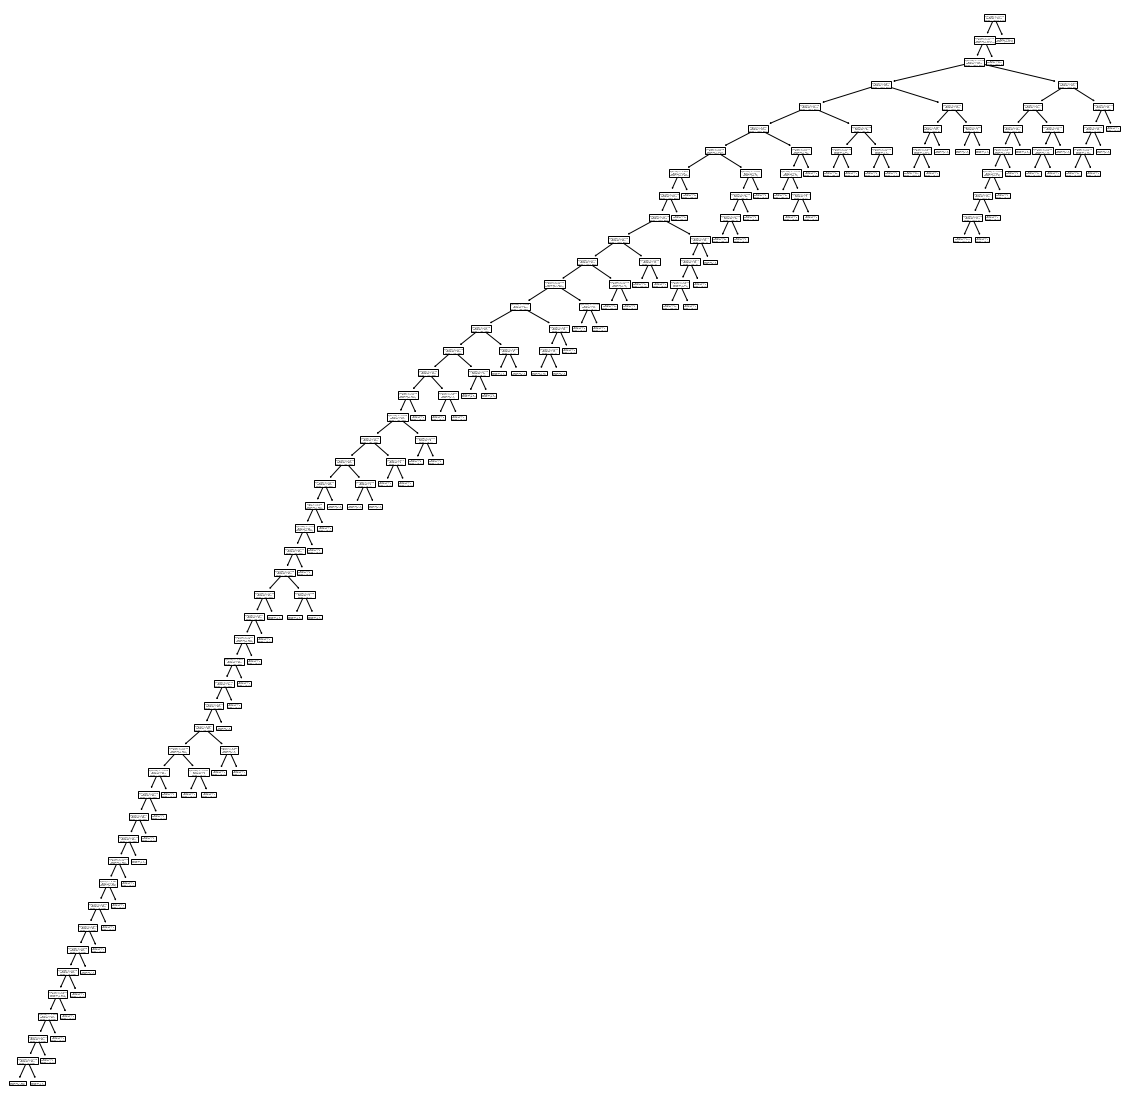

In [50]:
plt.figure(figsize=(20,20))
plot_tree(cart)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
np.random.seed(123)
spamRF = RandomForestClassifier()
RF = spamRF.fit(X_train, y_train)

In [54]:
training_acc = round(accuracy_score(y_train, spamRF.predict(X_train)),3)*100
print('Training Accuracy = {}%'.format(training_acc))
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_train, spamRF.predict(X_train)))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_train, spamRF.predict(X_train)))
print("AUC: ", roc_auc_score(y_train, spamRF.predict_proba(X_train)[:, 1]))

Training Accuracy = 100.0%

 Confusiton Matrix:
 [[3064    0]
 [   0  945]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3064
           1       1.00      1.00      1.00       945

    accuracy                           1.00      4009
   macro avg       1.00      1.00      1.00      4009
weighted avg       1.00      1.00      1.00      4009

AUC:  1.0


In [62]:
from scikitplot.metrics import plot_roc_curve as auc_roc

Testing Accuracy = 96.1%
F1 Score = 92.10000000000001

 Confusiton Matrix:
 [[1259   37]
 [  30  393]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1296
           1       0.91      0.93      0.92       423

    accuracy                           0.96      1719
   macro avg       0.95      0.95      0.95      1719
weighted avg       0.96      0.96      0.96      1719

AUC:  0.950264315734174


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


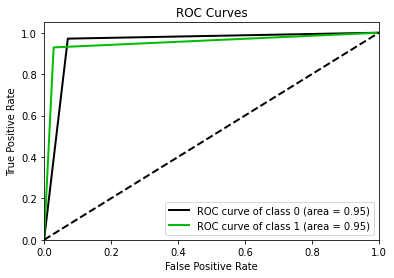

In [63]:
pred = cart.predict(X_test)
print('Testing Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
print('F1 Score = {}'.format(round(f1_score(y_test, pred),3)*100)) #, average='weighted'
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
print("AUC: ", roc_auc_score(y_test, cart.predict_proba(X_test)[:, 1]))
auc_roc(y_test, cart.predict_proba(X_test), curves=['each_class'])
plt.show()

Testing Accuracy = 97.1%
F1 Score = 93.8

 Confusiton Matrix:
 [[1293    3]
 [  47  376]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1296
           1       0.99      0.89      0.94       423

    accuracy                           0.97      1719
   macro avg       0.98      0.94      0.96      1719
weighted avg       0.97      0.97      0.97      1719

AUC:  0.9985935995096752


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


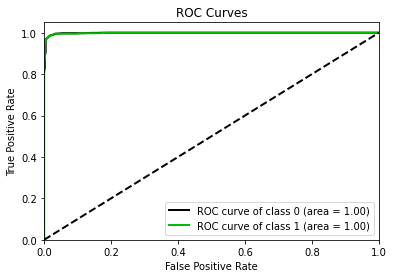

In [64]:
pred = RF.predict(X_test)
print('Testing Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
print('F1 Score = {}'.format(round(f1_score(y_test, pred),3)*100)) #, average='weighted'
print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
print("AUC: ", roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1]))
auc_roc(y_test, RF.predict_proba(X_test), curves=['each_class'])
plt.show()

Random Forest works better than CART as the accuracy, f1 score, auc, precision, recall are all greater than that of CART.

**Conclusion**
Through this experiment, I understood how to classify emails as ham or spam through natural language processing. I also learnt about the several steps in nlp, such as text preprocessing, analysis etc. and then applied classic machine leanring models to predict the possibility of an email to be ham or spam.